Notebook for the first analysis of the Animal Future survey.

**Objective**: understand which are the indicators that influenced past adoption of SBP. The goal is to replace the education level as proxy indicator for the risk aversion of farmers.

In [10]:
import pandas as pd
import numpy as np
import math
import os

In [11]:
# For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [12]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data upload

In [13]:
path_to_data = "../survey_data/AF_survey_data_30.xlsx"

In [14]:
farms30 = pd.read_excel(path_to_data, index_col=0)
farms30.head()

,AdoptedSBP,PastureSurface,CattlePercentage,Distrito,Concelho,FarmerSince,PercentRentedLand,LegalForm,HighestEducationalDegree,HighestAgriculturalEducationalDegree,ExpectationFamilySuccession
FARM_ID,,,,,,,,,,,
PT02,0,364.00,0.0,Setúbal,Grândola,29,0.0,Individual,Undergraduate,Undergraduate,Yes
PT13,1,542.58,1.0,Portalegre,Avis,11,0.0,Associated,Undergraduate,Undergraduate,Yes
PT15,1,262.70,1.0,Portalegre,Monforte,11,1.0,Associated,Undergraduate,Undergraduate,Yes
PT16,0,23.00,1.0,Évora,Évora,3,1.0,Individual,Undergraduate,Undergraduate,Yes
PT17,1,250.00,1.0,Évora,Montemor,10,1.0,Associated,Undergraduate,None,Yes


## Data exploration

In [15]:
farms30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, PT02 to PT43
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AdoptedSBP                            30 non-null     int64  
 1   PastureSurface                        30 non-null     float64
 2   CattlePercentage                      30 non-null     float64
 3   Distrito                              30 non-null     object 
 4   Concelho                              30 non-null     object 
 5   FarmerSince                           30 non-null     int64  
 6   PercentRentedLand                     30 non-null     float64
 7   LegalForm                             30 non-null     object 
 8   HighestEducationalDegree              30 non-null     object 
 9   HighestAgriculturalEducationalDegree  30 non-null     object 
 10  ExpectationFamilySuccession           30 non-null     object 
dtypes: float64(3), int64(

In [16]:
label = 'AdoptedSBP'

### Numerical attributes

In [17]:
numerical_attributes = ['PastureSurface', 'CattlePercentage', 'FarmerSince', 'PercentRentedLand']
farms30_num = farms30[[label] + numerical_attributes]

In [18]:
farms30_num.describe()

,AdoptedSBP,PastureSurface,CattlePercentage,FarmerSince,PercentRentedLand
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.566667,509.447667,0.810436,16.033333,0.248616
std,0.504007,618.480397,0.346573,11.505571,0.411126
min,0.000000,23.000000,0.000000,1.000000,0.000000
25%,0.000000,141.250000,0.739726,8.000000,0.000000
50%,1.000000,316.000000,1.000000,11.000000,0.000000
75%,1.000000,424.920000,1.000000,25.750000,0.371753
max,1.000000,2500.000000,1.000000,40.000000,1.000000


Saving figure Numerical Attributes_Histograms


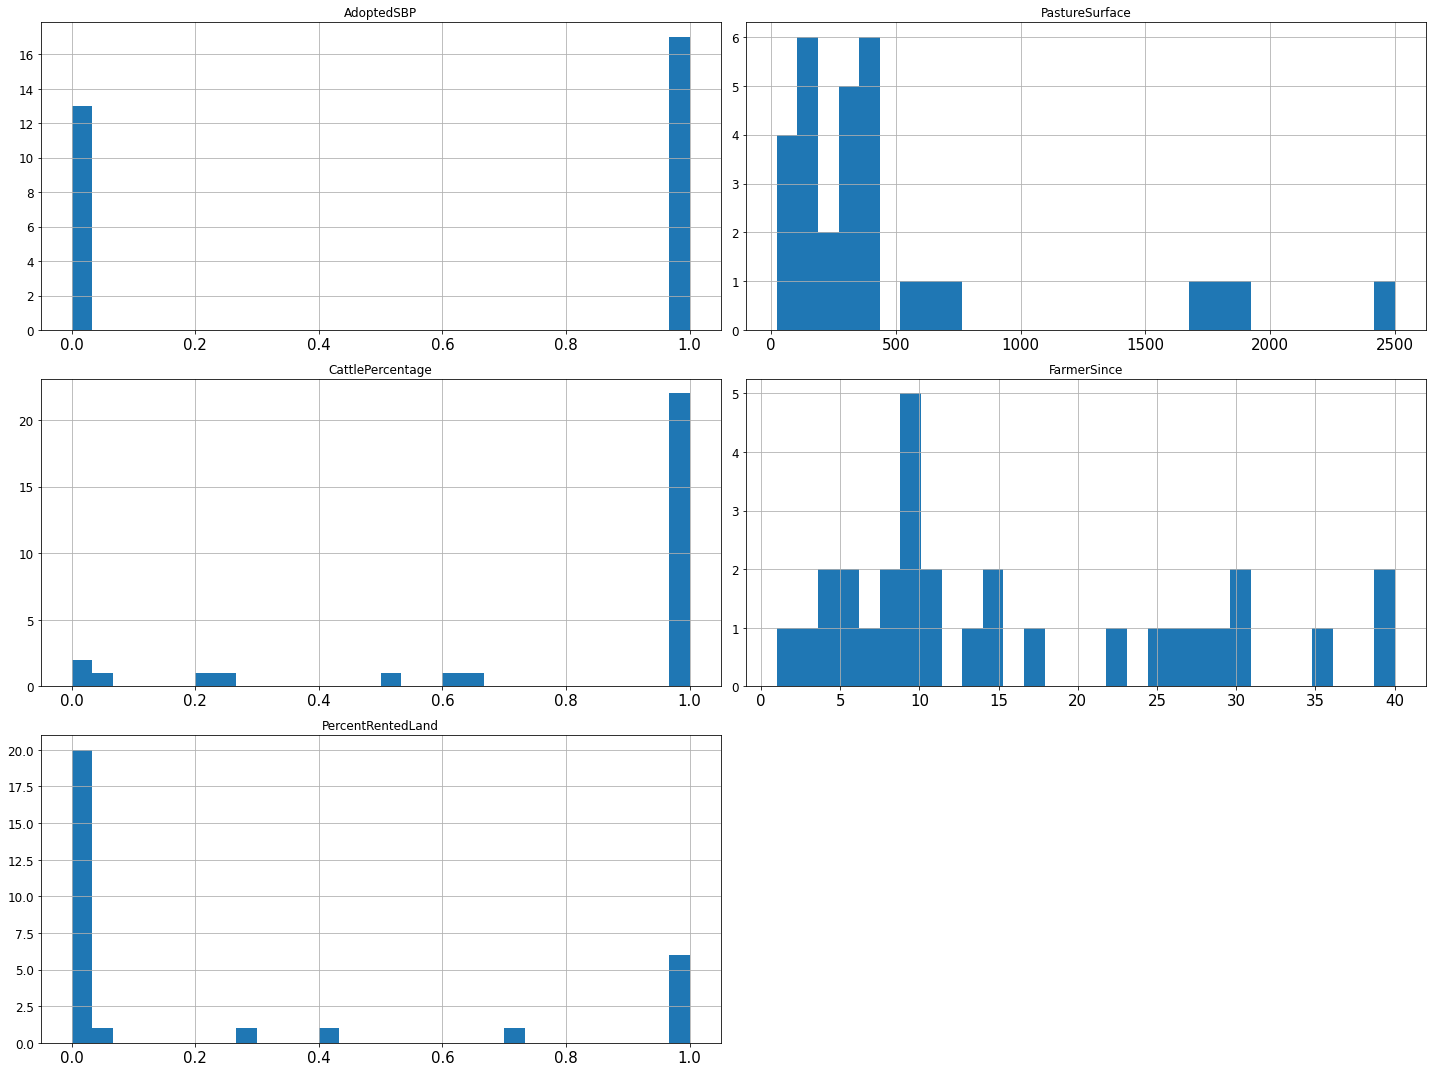

In [33]:
farms30_num.hist(figsize=(20, 15), bins=30, xlabelsize=15)
save_fig('Numerical Attributes_Histograms')

#### Correlations

Pearson's correlation

Spearman's correlation

In [20]:
from scipy.stats import spearmanr
for (columnName, columnData) in farms30_num.iteritems():
    coef, p = spearmanr(columnData, farms30_num['AdoptedSBP'])
    print(columnName, coef, p)

AdoptedSBP 1.0 0.0
PastureSurface 0.13600431549464917 0.47361260369725755
CattlePercentage -0.049925873501914346 0.7933222226556211
FarmerSince 0.015572826296638708 0.9349041243272547
PercentRentedLand -0.21886442817943424 0.24524074278318292


Kendall's correlation

#### CattlePercentage focus

In [21]:
farms30_cowbins = pd.DataFrame()
farms30_cowbins['AdoptedSBP'] = farms30['AdoptedSBP'].copy()
farms30_cowbins['CattlePercentage'] = pd.cut(farms30['CattlePercentage'],
                                             bins=[-np.inf,0.33,0.66,np.inf],
                                             labels=[1,2,3])

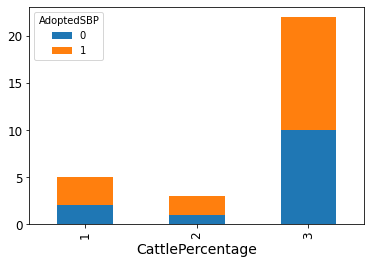

In [22]:
fig = farms30_cowbins.groupby('CattlePercentage')['AdoptedSBP'].value_counts().unstack().plot(kind='bar', stacked=True)

### Categorical attributes

In [23]:
categorical_attributes = ['Distrito', 'Concelho', 'LegalForm', 'HighestEducationalDegree', 
                          'HighestAgriculturalEducationalDegree', 'ExpectationFamilySuccession']

In [24]:
for cat_attr in categorical_attributes:
    print(farms30[cat_attr].value_counts())
    print("")

Évora         13
Beja           8
Portalegre     4
Setúbal        4
Santarém       1
Name: Distrito, dtype: int64

Montemor                6
Évora                   5
Beja                    2
Grândola                1
Coruche                 1
Monforte                1
Alcácer do Sal          1
Castro Verde            1
Santiago do Cacém       1
Montijo                 1
Avis                    1
Elvas                   1
Aljustrel               1
Serpa                   1
Ferreira do Alentejo    1
Alvito                  1
Arraiolos               1
Portel                  1
Arronches               1
Ourique                 1
Name: Concelho, dtype: int64

Associated    22
Individual     8
Name: LegalForm, dtype: int64

Undergraduate    14
Graduate         13
Secondary         2
Primary           1
Name: HighestEducationalDegree, dtype: int64

Undergraduate    13
Graduate         11
None              6
Name: HighestAgriculturalEducationalDegree, dtype: int64

Yes    20
No     10
Name: 

Saving figure Categorical Attributes_Stacked Histograms


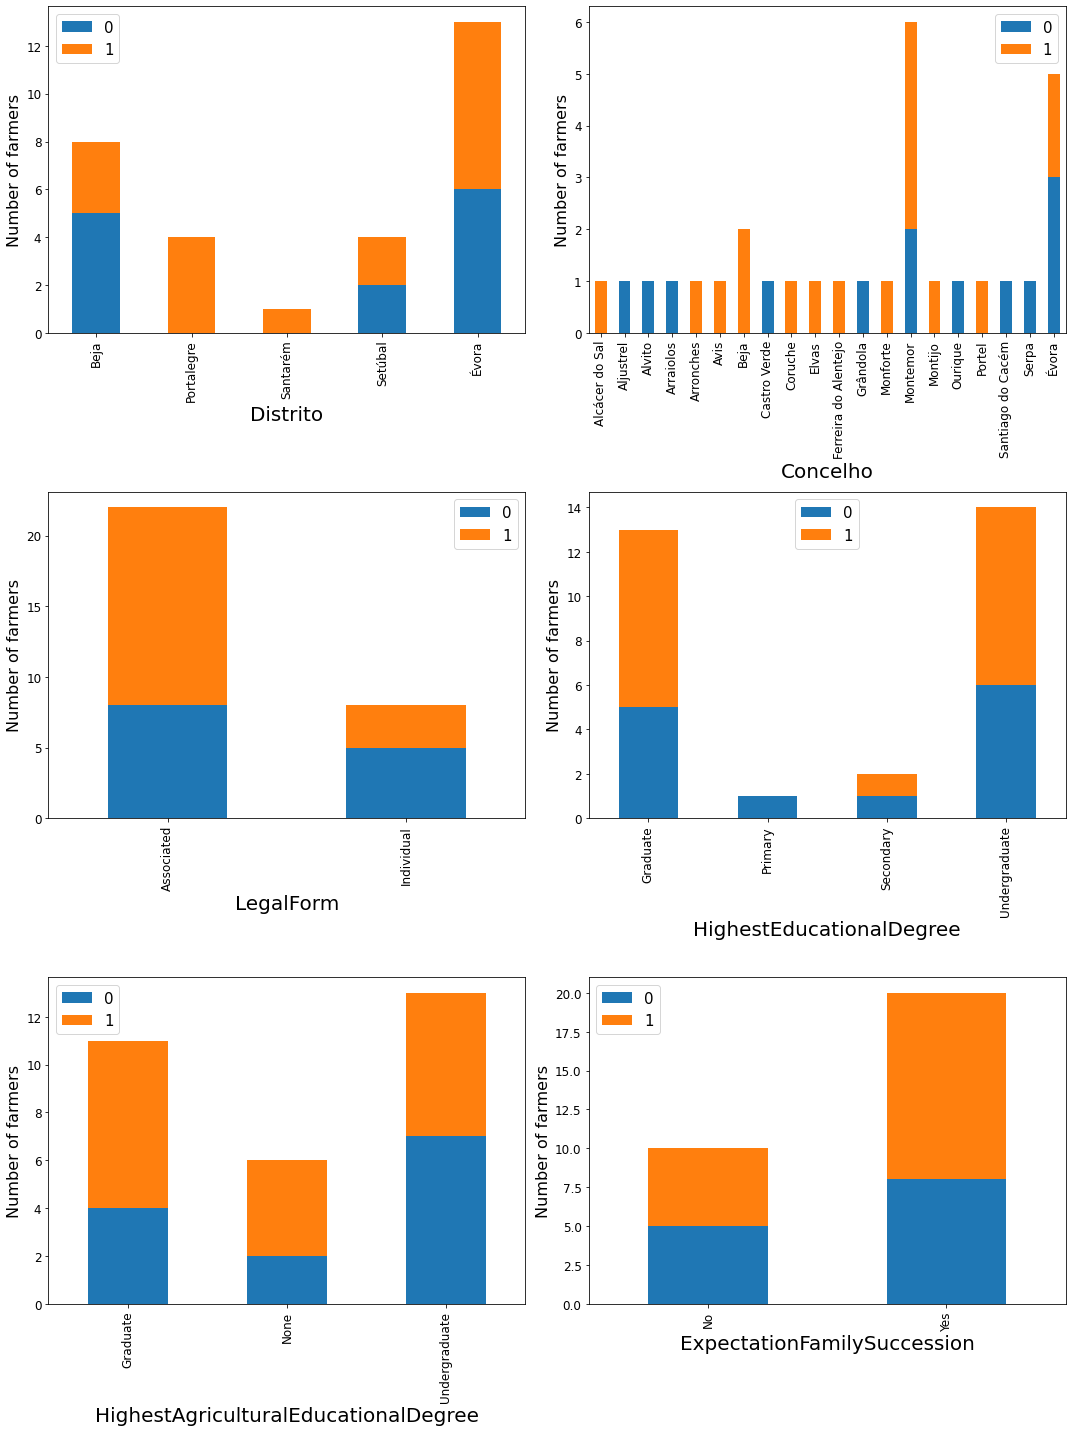

In [43]:
fig, axes = plt.subplots(math.ceil(len(categorical_attributes)/2), ncols=2, figsize=(15, 20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
axes = axes.flatten()
i = 0

for cat_attr in categorical_attributes:
    ax = axes[i]
    hist = farms30.groupby(cat_attr)['AdoptedSBP'].value_counts().unstack().plot(ax=ax, kind='bar', stacked=True, )
    ax.set_ylabel("Number of farmers", fontsize=16)
    ax.legend(loc='best', fontsize=15)
    ax.xaxis.label.set_size(20)
    i += 1
    
save_fig('Categorical Attributes_Stacked Histograms')

### Person's Chi-squared test for categorical features

In [26]:
farms30_cat_nolab = farms30[categorical_attributes]
farms30_labels = farms30[label].copy()

#### scikit-learn implementation
**NOTE**: results different than doing it manually with excel, for the right version check implementation below with Scipy

**Why such a high result for Concelho?** 
If we'd have 24 different Concelhos, 1 for each instance, and 12 adopters and 12 not, the expected value - with independent categories - for each cell would be: (1*12)/24 = 0.5. But 0.5 is not possible as label, it will always be 0 or 1 so we will have a high value of Chi2.

#### SciPy implementation 
(same results as with Excel)

In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [28]:
def chi2_test(attribute):
    contingency_tab= pd.crosstab(farms_labels,
                                farms30_cat_nolab[attribute],  
                                margins = False)
    stat, p, dof, expected = chi2_contingency(contingency_tab)
    # interpret p-value
    alpha = 0.05 # Significance value
    print('significance=%.3f, p=%.3f' % (alpha, p))
    print('chi2:', stat)
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    return p

In [29]:
p_values = []
for cat in categorical_attributes:
    print(cat)
    p_values.append(chi2_test(cat))
    print('')

Distrito


NameError: name 'farms_labels' is not defined

In [ ]:
p_values

In [ ]:
plt.bar([i for i in range(len(p_values))], p_values)
plt.xticks([0, 1, 2, 3, 4, 5], categorical_attributes, rotation='vertical')
plt.ylabel('p-value')
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.show()
save_fig('p-values of adoption and categ. attribute are independent')

## Logistic regression

In [171]:
farms30_selected = farms30.drop('Concelho', axis=1) # Too many with too few instances each. Distrito is better
farms30_selected = farms30.drop('HighestAgriculturalEducationalDegree', axis=1) # Redundant with HighestEducationalDegree

### Split the data

In [172]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(farms30_selected, test_size=0.2, random_state=42)

### Data preparation

In [173]:
farms = train_set.drop('AdoptedSBP', axis=1)
farms_labels = train_set['AdoptedSBP'].copy()

#### Categorical attributes

Ordinal econding for HighestEducationalDegree

In [174]:
farms_ordinal_attributes = ['HighestEducationalDegree']
farms_ordinal_cat = farms[farms_ordinal_attributes]
farms_ordinal_cat[:5]

,HighestEducationalDegree
FARM_ID,
PT42,Undergraduate
PT38,Undergraduate
PT25,Primary
PT02,Undergraduate
PT17,Undergraduate


In [175]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder_education = OrdinalEncoder(categories=[['Primary', 'Secondary', 'Undergraduate', 'Graduate']])
farms_ordinal_cat_encoded = ordinal_encoder_education.fit_transform(farms_ordinal_cat)

farms_ordinal_cat_encoded[:5]

array([[2.],
       [2.],
       [0.],
       [2.],
       [2.]])

One-hot encoding

In [176]:
farms_onehot_attributes = ['Distrito']
farms_onehot_cat = farms[farms_onehot_attributes]

farms_onehot_cat.head()

,Distrito
FARM_ID,
PT42,Setúbal
PT38,Évora
PT25,Beja
PT02,Setúbal
PT17,Évora


In [177]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
farms_onehot_cat_encoded = onehot_encoder.fit_transform(farms_onehot_cat)

farms_onehot_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [178]:
onehot_encoder.categories_

[array(['Beja', 'Portalegre', 'Santarém', 'Setúbal', 'Évora'], dtype=object)]

#### Preparation pipeline

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [180]:
numerical_attributes_1 = numerical_attributes
farms_other_ordinal_attributes = ['ExpectationFamilySuccession', 'LegalForm']

In [181]:
preparation_pipeline = ColumnTransformer([
    ('num', StandardScaler(), [attr for attr in numerical_attributes_1 if attr != 'AdoptedSBP']),
    ('ord_cat_edu', ordinal_encoder_education, ['HighestEducationalDegree']),
    ('other_ord_cat', OrdinalEncoder(), farms_other_ordinal_attributes),
    ('onehot_cat', onehot_encoder, farms_onehot_attributes)
])

In [182]:
farms_prepared = preparation_pipeline.fit_transform(farms)

In [183]:
# Print prepared data as a DataFrame
attributes = ([attr for attr in numerical_attributes_1 if attr != 'AdoptedSBP']
              + ['HighestEducationalDegree']
              + farms_other_ordinal_attributes)
for cat_name in onehot_encoder.categories_:
    attributes += cat_name.tolist()
pd.DataFrame(farms_prepared, columns=attributes, index=farms.index).head()

,PastureSurface,CattlePercentage,FarmerSince,PercentRentedLand,HighestEducationalDegree,ExpectationFamilySuccession,LegalForm,Beja,Portalegre,Santarém,Setúbal,Évora
FARM_ID,,,,,,,,,,,,
PT42,-0.345130,-0.430043,1.563341,-0.612880,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PT38,-0.204910,0.647537,-0.609320,-0.612880,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PT25,-0.638358,0.647537,-0.776448,1.816889,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
PT02,-0.280715,-2.085207,0.978394,-0.612880,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
PT17,-0.502298,0.647537,-0.609320,1.816889,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Model training

In [184]:
from sklearn.linear_model import LogisticRegression

logit_regr = LogisticRegression()
logit_regr.fit(farms_prepared, farms_labels)

LogisticRegression()

In [185]:
some_data = farms_prepared[:5]
some_labels = farms_labels.iloc[:5]
print('Predict:', logit_regr.predict(some_data))
print('Labels:', some_labels)

Predict: [1 1 0 1 0]
Labels: FARM_ID
PT42    1
PT38    0
PT25    0
PT02    0
PT17    1
Name: AdoptedSBP, dtype: int64


### Logit regression with l2 regulaization

In [186]:
farms_prepared.shape

(24, 12)

In [187]:
from sklearn.model_selection import cross_val_score

cross_val_score(logit_regr, farms_prepared, farms_labels, scoring='accuracy', cv=4)

array([0.16666667, 0.33333333, 0.66666667, 0.33333333])

In [188]:
for attr, coef in zip(attributes, logit_regr.coef_.tolist()[0]):
    print(coef, attr)

0.006124786968041331 PastureSurface
-0.2879026423328905 CattlePercentage
-0.23530880029721324 FarmerSince
-0.4501034192954888 PercentRentedLand
-0.06396833707427993 HighestEducationalDegree
0.37195008551781195 ExpectationFamilySuccession
-0.7424508726997797 LegalForm
-0.7773556965302916 Beja
0.8924505017754667 Portalegre
0.20624465126872416 Santarém
-0.1441393584982135 Setúbal
-0.1771571648423813 Évora


### Logit regression with l1 regul

In [189]:
logit_regr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
cross_val_score(logit_regr_l1, farms_prepared, farms_labels, scoring='accuracy', cv=2)

array([0.5, 0.5])

In [190]:
logit_regr_l1.fit(farms_prepared, farms_labels)

LogisticRegression(penalty='l1', solver='liblinear')

In [191]:
for attr, coef in zip(attributes, logit_regr_l1.coef_.tolist()[0]):
    print(coef, attr)

0.0 PastureSurface
-0.0977185178231096 CattlePercentage
0.0 FarmerSince
-0.28690274015448747 PercentRentedLand
0.04817316767592697 HighestEducationalDegree
0.0 ExpectationFamilySuccession
-0.2564732564749613 LegalForm
-0.31249769790069887 Beja
1.0742466245083973 Portalegre
0.0 Santarém
0.0 Setúbal
0.0 Évora


### Evalutation through precision and recall

In [192]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [193]:
predict_l2 = cross_val_predict(logit_regr, farms_prepared, farms_labels, cv=3)
confusion_matrix(farms_labels, predict_l2)

array([[4, 7],
       [7, 6]], dtype=int64)

In [194]:
print('Precision:', precision_score(farms_labels, predict_l2))
print('Recall:', recall_score(farms_labels, predict_l2))
print('F1 score:', f1_score(farms_labels, predict_l2))

Precision: 0.46153846153846156
Recall: 0.46153846153846156
F1 score: 0.46153846153846156


## Results analysis

**Observations on results**: 
* The results are really bad.
* Some things really do not make sense, as the negative and really low score for the PastureSurface
* The coefficients are all pretty close with the l2.
* The l1 performs worse, but also maybe beacuse give a lot of importance to the belonging of one municipality

**The results on the coefficients from the lasso regularization should not be considered, since the performance is really bad!**

**Possible errors**:
* Using each municipality separately like this make sense? Probably yes actually


## Logistic regression with less features

Let's try to reduce the features to:
* PastureSurface: exhibited high correlation and should be linked with NPV (for this reason could also be taken away)
* PercenRentedLand: highest correlation (negative) and still a high weight in l1 regularization 
* HighestEducationalDegree: used in the theoretical model (to check if the Agricultural one would be better)
* LegalForm: looked interesting from the graph


* To add inter and intra municipality adoption when available, for the moment municipality not considered

Removed:
* CattlePercentage: looking at the graph, it looks irrelevant for the data we have
* FarmerSince: also beacuse it has the problem of farmers from less than 10 years, so after adoption, that could have inherited and so should have counted as older farmers
* ExpectationFamilySuccession: looking at the graph, no difference if expected or not

### Create new dataset

In [359]:
degree = 'HighestEducationalDegree' #To change between the two educational degrees

In [371]:
farms30_2 = farms30[['AdoptedSBP', 'PastureSurface', 'PercentRentedLand', degree, 'LegalForm']]

farms30_2.head()

,AdoptedSBP,PastureSurface,PercentRentedLand,HighestEducationalDegree,LegalForm
FARM_ID,,,,,
PT02,0,364.00,0.0,Undergraduate,Individual
PT13,1,542.58,0.0,Undergraduate,Associated
PT15,1,262.70,1.0,Undergraduate,Associated
PT16,0,23.00,1.0,Undergraduate,Individual
PT17,1,250.00,1.0,Undergraduate,Associated


In [372]:
train_set_2, test_set_2 = train_test_split(farms30_2, test_size=0.2, random_state=10)

In [373]:
# Activate to train and cross-validate on entire dataset
train_set_2 = farms30_2

In [374]:
farms_2 = train_set_2.drop('AdoptedSBP', axis=1)
farms_2_labels = train_set_2['AdoptedSBP'].copy()

In [375]:
farms_2_test = test_set_2.drop('AdoptedSBP', axis=1)
farms_2_labels_test = test_set_2['AdoptedSBP'].copy()

### Transformation pipeline

In [376]:
numerical_attributes_2 = ['PastureSurface', 'PercentRentedLand']

attributes_2 = numerical_attributes_2 + ['HighestEducationalDegree', 'LegalForm']

In [377]:
preparation_pipeline_2 = ColumnTransformer([
    ('num', StandardScaler(), numerical_attributes_2),
    ('ord_cat_edu', ordinal_encoder_education, ['HighestEducationalDegree']),
    ('cat_legalform', OrdinalEncoder(), ['LegalForm']),
    #('districts', OneHotEncoder(), ['Distrito'])
])

In [378]:
farms_2_prepared = preparation_pipeline_2.fit_transform(farms_2)

### Model fitting and prediction

In [379]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#### l2 regularizer

In [380]:
logit_regr_2_l2 = LogisticRegression()

Trainig and evaluation on the training set

In [381]:
logit_regr_2_l2.fit(farms_2_prepared, farms_2_labels)
predict_l2_nocross = logit_regr_2_l2.predict(farms_2_prepared)
print('Precision:', precision_score(farms_2_labels, predict_l2_nocross))
print('Recall:', recall_score(farms_2_labels, predict_l2_nocross))
print('F1 score:', f1_score(farms_2_labels, predict_l2_nocross))

Precision: 0.6190476190476191
Recall: 0.7647058823529411
F1 score: 0.6842105263157895


In [382]:
for attr, coef in zip(attributes_2, logit_regr_2_l2.coef_.tolist()[0]):
    print(coef, attr)

0.16689891692823788 PastureSurface
-0.2588989615607307 PercentRentedLand
0.19256352330939291 HighestEducationalDegree
-0.46902625587548435 LegalForm


Cross-validation

In [383]:
cross_val_score(logit_regr_2_l2, farms_2_prepared, farms_2_labels, scoring='accuracy', cv=3)

array([0.3, 0.3, 0.5])

In [384]:
predict_l2 = cross_val_predict(logit_regr_2_l2, farms_2_prepared, farms_2_labels, cv=3)
confusion_matrix(farms_2_labels, predict_l2)

array([[ 0, 13],
       [ 6, 11]], dtype=int64)

In [385]:
print('Precision:', precision_score(farms_2_labels, predict_l2))
print('Recall:', recall_score(farms_2_labels, predict_l2))
print('F1 score:', f1_score(farms_2_labels, predict_l2))

Precision: 0.4583333333333333
Recall: 0.6470588235294118
F1 score: 0.5365853658536585


#### l1 regression

In [386]:
logit_regr_2_l1 = LogisticRegression(penalty='l1', solver='liblinear')

Trainig and evaluation on the training set

In [387]:
logit_regr_2_l1.fit(farms_2_prepared, farms_2_labels)
predict_l1_nocross = logit_regr_2_l1.predict(farms_2_prepared)
print('Precision:', precision_score(farms_2_labels, predict_l1_nocross))
print('Recall:', recall_score(farms_2_labels, predict_l1_nocross))
print('F1 score:', f1_score(farms_2_labels, predict_l1_nocross))

Precision: 0.5833333333333334
Recall: 0.8235294117647058
F1 score: 0.6829268292682927


In [388]:
logit_regr_2_l1.fit(farms_2_prepared, farms_2_labels)
for attr, coef in zip(attributes_2, logit_regr_2_l1.coef_.tolist()[0]):
    print(coef, attr)

0.11219770794115394 PastureSurface
-0.19200804108340727 PercentRentedLand
0.13013132123020477 HighestEducationalDegree
-0.15185622943822563 LegalForm


Cross-validation

In [389]:
cross_val_score(logit_regr_2_l1, farms_2_prepared, farms_2_labels, scoring='f1', cv=3)

array([0.46153846, 0.57142857, 0.66666667])

In [390]:
predict_l1 = cross_val_predict(logit_regr_2_l1, farms_2_prepared, farms_2_labels, cv=3)
confusion_matrix(farms_2_labels, predict_l1)

array([[ 0, 13],
       [ 5, 12]], dtype=int64)

In [404]:
print('Precision:', precision_score(farms_2_labels, predict_l1))
print('Recall:', recall_score(farms_2_labels, predict_l1))
print('F1 score:', f1_score(farms_2_labels, predict_l1))

Precision: 0.5666666666666667
Recall: 1.0
F1 score: 0.7234042553191489


In [393]:
#Validation on test set
farms_2_prepared_test = preparation_pipeline_2.transform(farms_2_test)
test_l1_pred = logit_regr_2_l1.predict(farms_2_prepared_test)
print('Precision:', precision_score(farms_2_labels_test, test_l1_pred))
print('Recall:', recall_score(farms_2_labels_test, test_l1_pred))
print('F1 score:', f1_score(farms_2_labels_test, test_l1_pred))

Precision: 0.5
Recall: 0.6666666666666666
F1 score: 0.5714285714285715


# Export excel files

## For toy abm

### Initialization data

In [394]:
farms30_toymodel_init = pd.DataFrame()
farms30_toymodel_init['PastureSurface'] = farms30['PastureSurface'].copy()
farms30_toymodel_init['Pasture'] = 'Natural Pasture'

In [395]:
farms30_toymodel_init.head()

,PastureSurface,Pasture
FARM_ID,,
PT02,364.00,Natural Pasture
PT13,542.58,Natural Pasture
PT15,262.70,Natural Pasture
PT16,23.00,Natural Pasture
PT17,250.00,Natural Pasture


In [396]:
path_init = '../toy_abm/data/FarmsData.xlsx'
farms30_toymodel_init.to_excel(path_init)

### Validation data

In [397]:
farms30_valid = pd.DataFrame()
farms30_valid['Pasture'] = farms30['AdoptedSBP'].replace({1: 'Sown Permanent Pasture', 0: 'Natural Pasture'})

In [398]:
farms30_valid.head()

,Pasture
FARM_ID,
PT02,Natural Pasture
PT13,Sown Permanent Pasture
PT15,Sown Permanent Pasture
PT16,Natural Pasture
PT17,Sown Permanent Pasture


In [399]:
path_valid = '../toy_abm/data/FarmsDataValidation.xlsx'
farms30_valid.to_excel(path_valid)

## For toy model with municipalities

### Initialization data